In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cross_validation import train_test_split
from sklearn import svm
%matplotlib inline

In [2]:
labeled_images = pd.read_csv('./input/train.csv')
images = labeled_images.iloc[:, 1:]
labels = labeled_images.iloc[:, :1]
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=0)

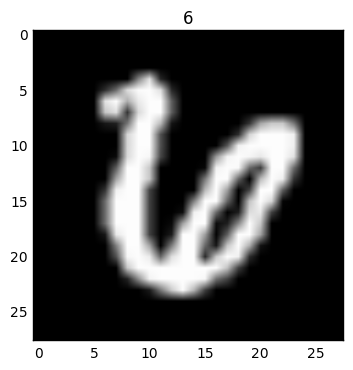

In [3]:
i = 1
img = train_images.iloc[i].as_matrix()
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(train_labels.iloc[i, 0])

In [ ]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images, test_labels)

(array([ 582.,   13.,   15.,    9.,   17.,    5.,   10.,   15.,   15.,  103.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

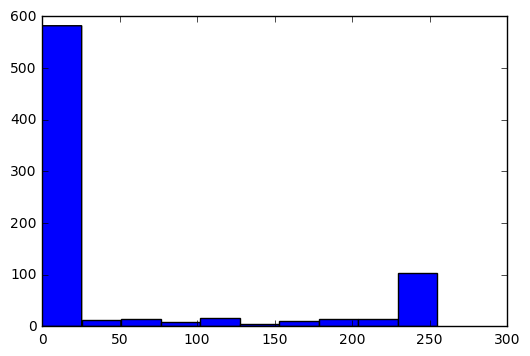

In [4]:
plt.hist(train_images.iloc[i])

/Users/conghuai/Dropbox/lib/mac/anaconda/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/conghuai/Dropbox/lib/mac/anaconda/anaconda/lib/python3.5/site-packages/pandas/core/frame.py:2392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.where(-key, value, inplace=True)
/Users/conghuai/Dropbox/lib/mac/anaconda/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

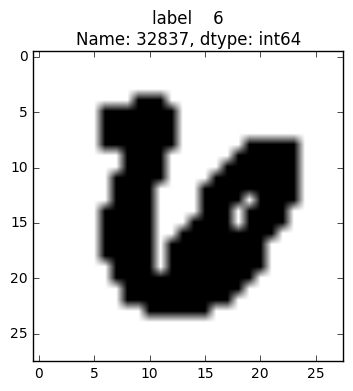

In [5]:
test_images[test_images>0] = 1
train_images[train_images>0] = 1

img = train_images.iloc[i].as_matrix().reshape((28,28))
plt.imshow(img, cmap='binary')
plt.title(train_labels.iloc[i])

(array([ 668.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  116.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

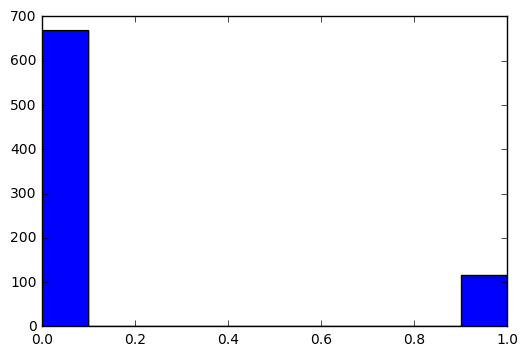

In [8]:
plt.hist(train_images.iloc[i])

In [6]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images, test_labels)

0.94285714285714284

In [7]:
test_data = pd.read_csv('./input/test.csv')
test_data[test_data>0]=1
results = clf.predict(test_data)

In [11]:
df = pd.DataFrame(results)
df.index.name = 'ImageId'
df.index+=1
df.columns = ['Label']
df.to_csv('./output/svm.csv', header=True)